# Visión por Computadora

## Integrantes

- Sergio Orellana 221122
- Rodrigo Mansilla 22611
- Ricardo Chuy 221007

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def show_wrong_rgb_img(img, title="Imagen", cmap=None):
    # esta funcion es para mostrar que es lo que pasa si no se hace la correccion
    # de los canales de color de BGR a RGB
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

def show_img(img, title="Imagen", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    # TODO: Matplotlib espera RGB, OpenCV carga BGR.
    # Verifica si la imagen tiene 3 canales y conviértela para visualización correcta.
    if len(img.shape) == 3 and cmap is None:
        img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_show = img
    
    plt.imshow(img_show, cmap=cmap)
    plt.axis('off')
    plt.show()

## Ejercicio 1: Contraste y Brillo Vectorizado

In [5]:
def manual_contrast_brightness(image, alpha, beta):
    """
    Aplica g(x) = alpha * f(x) + beta de forma segura.
    Args:
        image: numpy array uint8
        alpha: float (contraste)
        beta: float (brillo)
    Returns:
        numpy array uint8
    """
    # RETO 1: Implementar pipeline seguro
    # 1. Convertir a float32 y normalizar a [0, 1]
    # 2. Aplicar fórmula matemática vectorizada (Sin bucles for)
    # 3. Aplicar np.clip para evitar valores fuera de rango
    # 4. Des-normalizar (x255) y castear a uint8
    
    # Se convierte la imagen a float32 y se normaliza a [0, 1]
    img_float = image.astype(np.float32) / 255.0

    # Se aplicó la fórmula matemática de forma vectorizada sin bucles
    beta_norm = beta / 255.0
    transformed = alpha * img_float + beta_norm

    # Se aplica np.clip para evitar valores fuera de rango
    clipped = np.clip(transformed, 0.0, 1.0)

    # Se realizó la des-normalización y el casteo a uint8
    processed_img = (clipped * 255.0).astype(np.uint8)
    
    return processed_img

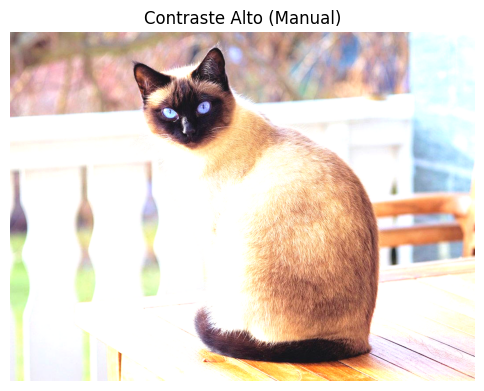

In [6]:
# Cargar imagen (Asegúrate de tener una imagen 'cat.jpg')
img = cv2.imread('cat.jpg')

if img is None:
    print("Error: No se encontró la imagen.")
else:
    # Prueba de Contraste
    contrast_img = manual_contrast_brightness(img, 1.5, 20)
    show_img(contrast_img, "Contraste Alto (Manual)")

## Ejercicio 2: Corrección Gamma Manual

In [7]:
def manual_gamma_correction(image, gamma):
    """
    Aplica V_out = V_in ^ gamma
    """
    # RETO 2: Implementar corrección Gamma
    # Recordar: La operación potencia es costosa. 
    # Usar Look-Up Table (LUT) es una optimización común, pero aquí usa matemáticas directas en float.
    
    # normalizacion de float
    img_float = image.astype(np.float32) / 255.0
    
    # correccion con el valor gamma usnado potencia, usando numpy para no iterar sobre cada uno
    corrected_power = np.power(img_float, gamma)

    # arreglar clipping, de igual forma usando numpy para evitar iterar
    # y tner valores fuera de rango
    correcteed_clipping = np.clip(corrected_power, 0 , 1)

    # desnomalizar para regresar a uint 8 para que se pueda mostrar la imagen
    gamm_img = (correcteed_clipping * 255.00).astype(np.uint8)

    return gamm_img

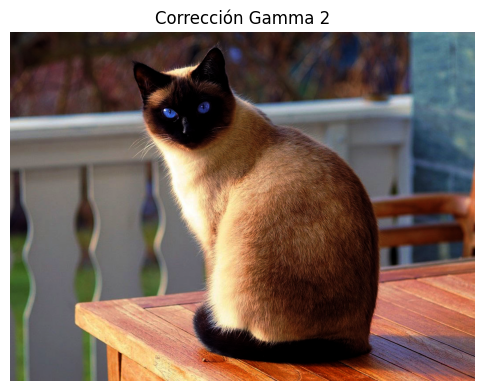

In [8]:
# Prueba de Gamma
if img is not None:
    gamma_img = manual_gamma_correction(img, 2) # Aclarar sombras
    show_img(gamma_img, "Corrección Gamma 2")

## Ejercicio 3: Segmentación Cromática

In [ ]:
img_path = "parrot.jpg"   
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"No se puede leer la imagen: {img_path}")


#### Convertir a HSV

In [43]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


#### Rangos

In [44]:
lower_yellow = np.array([20, 100, 100], dtype=np.uint8)
upper_yellow = np.array([35, 255, 255], dtype=np.uint8)

lower_orange = np.array([5, 150, 100], dtype=np.uint8)
upper_orange = np.array([20, 255, 255], dtype=np.uint8)

## Máscara

In [45]:

mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
mask = cv2.bitwise_or(mask_yellow, mask_orange)


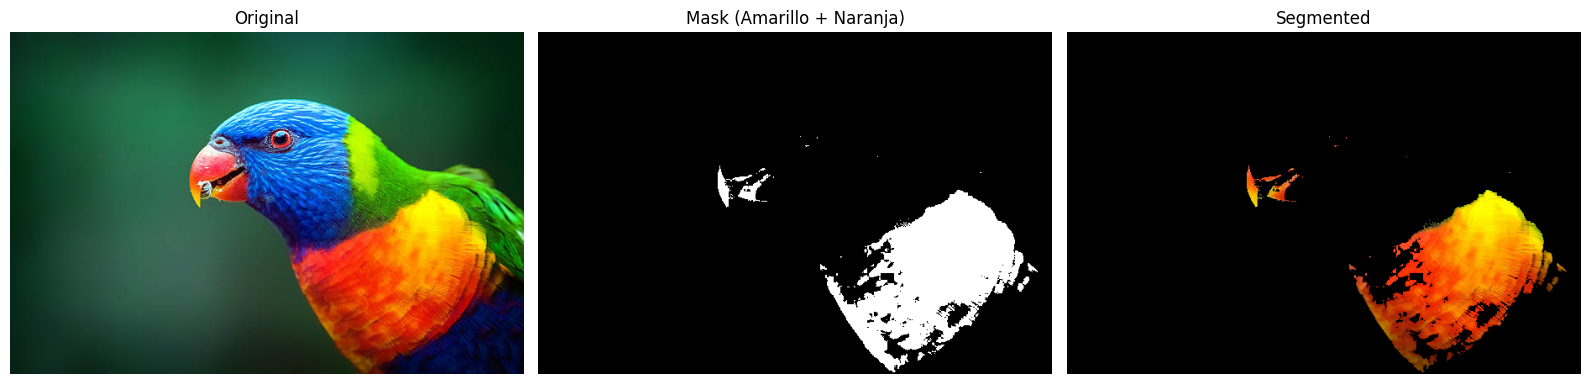

In [50]:
result = cv2.bitwise_and(image, image, mask=mask)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask (Amarillo + Naranja)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result_rgb)
plt.title("Segmented")
plt.axis("off")

plt.tight_layout()
plt.show()

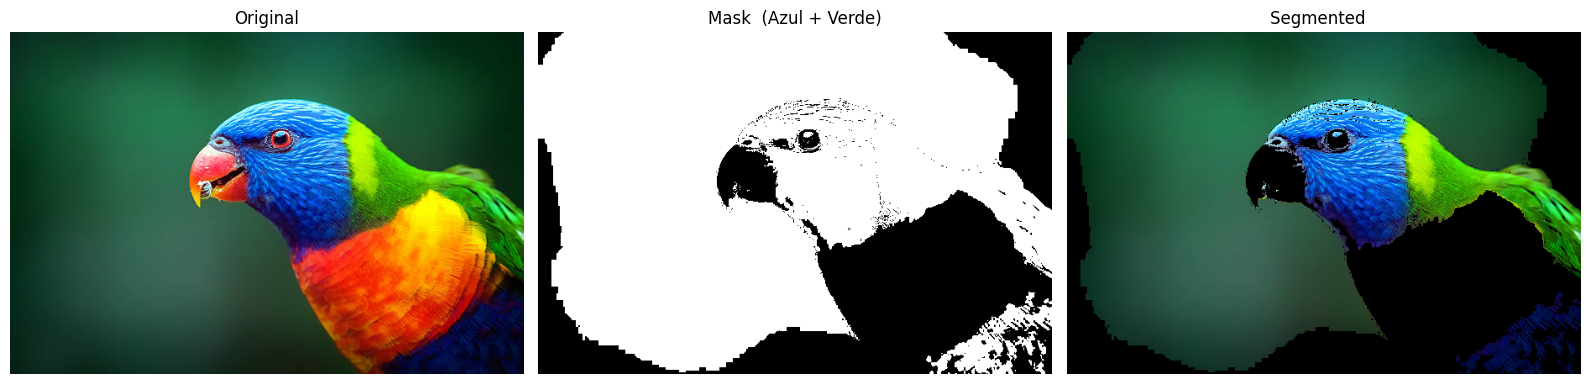

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "parrot.jpg"
image = cv2.imread(img_path)
if image is None:
    raise FileNotFoundError(f"No se puede leer la imagen: {img_path}")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_green = np.array([35, 50, 50], dtype=np.uint8)
upper_green = np.array([85, 255, 255], dtype=np.uint8)

lower_blue  = np.array([90, 50, 50], dtype=np.uint8)
upper_blue  = np.array([130, 255, 255], dtype=np.uint8)

mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue  = cv2.inRange(hsv, lower_blue,  upper_blue)

mask_raw = cv2.bitwise_or(mask_green, mask_blue)
result_raw  = cv2.bitwise_and(image, image, mask=mask_raw)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result_raw_rgb = cv2.cvtColor(result_raw, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_raw, cmap="gray")
plt.title("Mask  (Azul + Verde)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result_raw_rgb)
plt.title("Segmented  ")
plt.axis("off")

plt.tight_layout()
plt.show()


En este caso, la máscara toma al fondo como parte de la segmentación, esto por que el fondo es verde → cae dentro del rango de verde.

Entonces, aunque el azul del ave segmenta bien, el verde “explota” la máscara y  segmenta el ave + fondo.